# Regresión lineal
En el siguiente archivo se va a desarrollar la regresión lineal para las combinaciones de cada una de las variables que se encuentran en los datos provistos. Los datos se pueden encontrar [acá](https://docs.google.com/spreadsheets/u/1/d/12h1Pk1ZO-BDcGldzKW-IA9VMkU9RlUOPopFoOK6stdU/pubhtml).

### Imports

In [37]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sys  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import statsmodels.api as sm
from statsmodels.formula.api import ols

### Read file

In [38]:
municipios = pd.read_csv("/Users/Meili/Dropbox/Uniandes/Noveno/Visual/BonoParcial/Plebiscito-Colombia-2016/Plebiscito.csv")
municipios.head()

,Municipio,Departamento,Votos para senado 2014,Porcentaje de ��scar Iv��n Zuluaga (1ra vuelta),Total-1ra-vuelta,Participaci�_n (1ra vuelta),Ganador (1ra vuelta),Porcentaje de ��scar Iv��n Zuluaga (2da vuelta),Total-2da-vuelta,Participaci�_n (2da vuelta),...,Votos por el S�_,% S�_,Votos v��lidos,Votos totales,Cu��ntos salieron a votar,ind ruralidad 2014,Zonas de concentraci�_n,Cultivos il�_citos,Hect��reas de coca,Hect��reas de amapola
0,Medell�_n,Antioquia,430064,"38,48%",700732,"49,61%",Zuluaga,"63,04%",709359,"50,22%",...,253548,"37,03%",684721,694784,"46,06%","1,24%",No,No,"0,00","0,00"
1,Abejorral,Antioquia,4135,"62,52%",4827,"32,31%",Zuluaga,"78,54%",6748,"45,17%",...,1296,"38,11%",3401,3647,"23,88%","65,76%",No,No,"0,00","0,00"
2,Abriaqu�_,Antioquia,726,"40,76%",709,"37,26%",Zuluaga,"60,33%",852,"44,77%",...,213,"39,08%",545,572,"29,51%","64,87%",No,No,"0,00","0,00"
3,Alejandria,Antioquia,1675,"29,19%",1720,"39,30%",Santos,"44,34%",2163,"49,42%",...,966,"58,12%",1662,1735,"37,91%","48,09%",No,No,"0,00","0,00"
4,Amag��,Antioquia,5742,"33,36%",7407,"35,45%",Zuluaga,"53,28%",8814,"42,19%",...,2084,"33,49%",6223,6370,"28,92%","43,62%",No,No,"0,00","0,00"


In [ ]:
### Fix data

In [61]:
print (municipios)


                   Municipio Departamento  Votos para senado 2014  \
0                  Medell�_n    Antioquia                  430064   
1                  Abejorral    Antioquia                    4135   
2                  Abriaqu�_    Antioquia                     726   
3                 Alejandria    Antioquia                    1675   
4                     Amag��    Antioquia                    5742   
5                     Amalfi    Antioquia                    2320   
6                      Andes    Antioquia                   11671   
7               Angel�_polis    Antioquia                    1776   
8                  Angostura    Antioquia                    2080   
9                     Anor�_    Antioquia                    1308   
10    Santa F�� de Antioquia    Antioquia                    4734   
11                     Anz��    Antioquia                    1542   
12                 Apartad�_    Antioquia                   20033   
13                 Arboletes    An

### Scaterplot

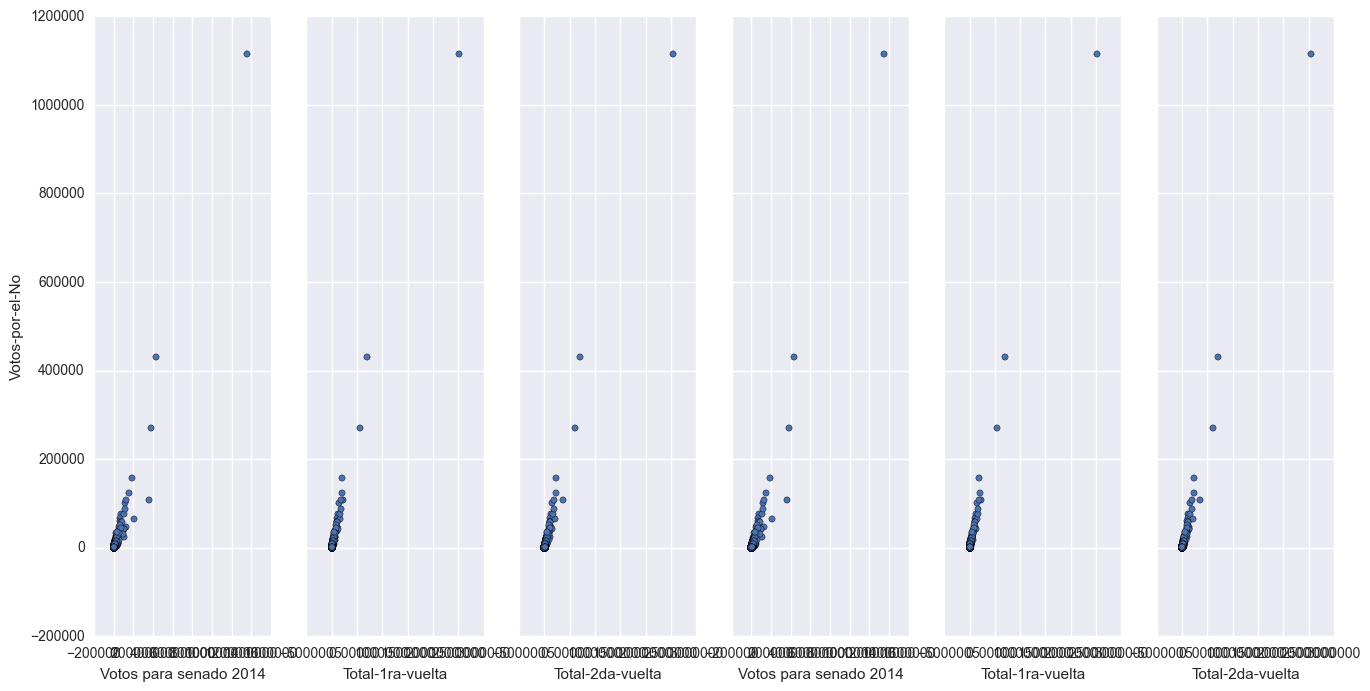

In [50]:
fig, axs = plt.subplots(1, 6, sharey=True)
municipios.plot(kind='scatter', x='Votos para senado 2014', y='Votos-por-el-No', ax=axs[0], figsize=(16, 8))
municipios.plot(kind='scatter', x='Total-1ra-vuelta', y='Votos-por-el-No', ax=axs[1])
municipios.plot(kind='scatter', x='Total-2da-vuelta', y='Votos-por-el-No', ax=axs[2])
municipios.plot(kind='scatter', x='Votos para senado 2014', y='Votos-por-el-No', ax=axs[3])
municipios.plot(kind='scatter', x='Total-1ra-vuelta', y='Votos-por-el-No', ax=axs[4])
municipios.plot(kind='scatter', x='Total-2da-vuelta', y='Votos-por-el-No', ax=axs[5])


### Regresion

In [52]:
n= len(municipios['Total-1ra-vuelta'])
x=np.array(municipios['Total-1ra-vuelta'])
y=np.array(municipios['Votos-por-el-No'])
sumx= float(sum(x))
sumy= float(sum(y))
sumx2= float(sum(x*x))
sumy2= float(sum(y*y))
sumxy= float(sum(x*y))
promx= float(sumx/n)
promy= float(sumy/n)

In [53]:
m =float(sumx*sumy - n*sumxy)/float((sumx**2-n*sumx2))

b= float(promy - m*promx)

m,b

(0.46246427513094834, 297.6022867569336)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 18: ordinal not in range(128)

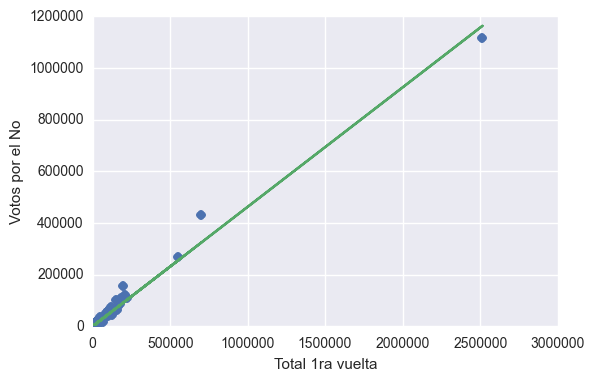

In [57]:
##Graficando

plt.plot(x,y,'o', label='Datos')
plt.plot(x, m*x + b, label='Ajuste')
plt.xlabel('Total 1ra vuelta')
plt.ylabel('Votos por el No')
plt.title('Mi primera Regresión')
plt.grid()
plt.legend(loc=4)
plt.show()

In [55]:
#Coeficiente de determinación

sigmax=np.sqrt(sumx2/n - promx**2)

sigmay=np.sqrt(sumy2/n - promy**2)

sigmaxy=sumxy/n - promx*promy

R2= (sigmaxy/(sigmax*sigmay))**2

R2

0.98505137725367287